출처 : https://yeomko.tistory.com/8?category=805638


### ALS Implementation

#### Initialize parameters
- r_lambda : normalization parameter
- alpha : confidence level
- nf : dimension of latent vector of each user and item (사용자와 아이템의 Latent Factor 행렬의 차원)
- initialzed value(40, 200, 40) are the best parameters from the paper

In [1]:
r_lambda = 40
nf = 200
alpha = 40

#### Initialze original rating matrix data(학습용 평점 데이터 설정)

- make sample (10 x 11) matrix -> 임의의 10x11 평점 행렬을 numpy 라이브러리를 통해서 생성
- 10 : num of users -> 사용자의 수
- 11 : num of items -> 아이템의 수

In [2]:
import numpy as np


# sample rating matrix
R = np.array([[0, 0, 0, 4, 4, 0, 0, 0, 0, 0, 0],
              [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
              [0, 0, 0, 0, 0, 0, 0, 1, 0, 4, 0],
              [0, 3, 4, 0, 3, 0, 0, 2, 2, 0, 0],
              [0, 5, 5, 0, 0, 0, 0, 0, 0, 0, 0],
              [0, 0, 0, 0, 0, 0, 5, 0, 0, 5, 0],
              [0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 5],
              [0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 4],
              [0, 0, 0, 0, 0, 0, 5, 0, 0, 5, 0],
              [0, 0, 0, 3, 0, 0, 0, 0, 4, 5, 0]])
print(R.shape)

(10, 11)


#### Initialize user and item latent factor matrix (사용자와 아이템의 Latent Factor Matrix를 초기화)
아주 작은 랜덤한 값들로 행렬의 값들을 초기화 시킴

- nu: num of users (10)
- ni: num of items (11)
- nf: dimension of latent vector

In [3]:
nu = R.shape[0]
ni = R.shape[1]

#initialize X and Y with very small values
X = np.random.rand(nu, nf) * 0.01
Y = np.random.rand(ni, nf) * 0.01

print(X)

[[0.00135782 0.00992724 0.00449301 ... 0.00535413 0.00581374 0.00961642]
 [0.00422936 0.00195726 0.00606761 ... 0.00206445 0.00238687 0.00920243]
 [0.00332336 0.00564857 0.0098257  ... 0.00892431 0.00018109 0.00836871]
 ...
 [0.00850351 0.0018173  0.00703524 ... 0.00117421 0.00620742 0.0065627 ]
 [0.00567069 0.00531431 0.00573805 ... 0.00499904 0.0003092  0.00219072]
 [0.00588886 0.00195633 0.00693111 ... 0.00457419 0.00161606 0.00814047]]


#### Initialize Binary Rating Matrix P (선호도 행렬 P 설정)
- 주어진 학습용 평점 테이블을 0과 1로 된 binary rating martix p로 바꿔줌

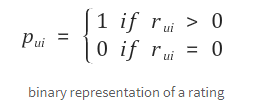
- Convert original rating matrix R into P
- Pui = 1 if Rui > 0
- Pui = 0 if Rui = 0

In [4]:
P = np.copy(R)
print(P)
P[P>0]=1
print(P)

[[0 0 0 4 4 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 1]
 [0 0 0 0 0 0 0 1 0 4 0]
 [0 3 4 0 3 0 0 2 2 0 0]
 [0 5 5 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 5 0 0 5 0]
 [0 0 4 0 0 0 0 0 0 0 5]
 [0 0 0 0 0 4 0 0 0 0 4]
 [0 0 0 0 0 0 5 0 0 5 0]
 [0 0 0 3 0 0 0 0 4 5 0]]
[[0 0 0 1 1 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 1]
 [0 0 0 0 0 0 0 1 0 1 0]
 [0 1 1 0 1 0 0 1 1 0 0]
 [0 1 1 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 0 0 1 0]
 [0 0 1 0 0 0 0 0 0 0 1]
 [0 0 0 0 0 1 0 0 0 0 1]
 [0 0 0 0 0 0 1 0 0 1 0]
 [0 0 0 1 0 0 0 0 1 1 0]]


#### Initialize Confidence Matrix C (신뢰도 행렬 C 설정)
- 주어진 학습용 평점 테이블에 Confidence level을 적용한 C 행렬을 구함
- confidence level을 구하는 공식

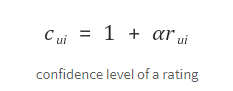
- Cui = 1 + alpha * Rui
- Cui means confidence level of certain rating data

In [6]:
C = 1 + alpha * R
print(C)

[[  1   1   1 161 161   1   1   1   1   1   1]
 [  1   1   1   1   1   1   1   1   1   1  41]
 [  1   1   1   1   1   1   1  41   1 161   1]
 [  1 121 161   1 121   1   1  81  81   1   1]
 [  1 201 201   1   1   1   1   1   1   1   1]
 [  1   1   1   1   1   1 201   1   1 201   1]
 [  1   1 161   1   1   1   1   1   1   1 201]
 [  1   1   1   1   1 161   1   1   1   1 161]
 [  1   1   1   1   1   1 201   1   1 201   1]
 [  1   1   1 121   1   1   1   1 161 201   1]]


#### Set up loss function (Loss Function 설정)
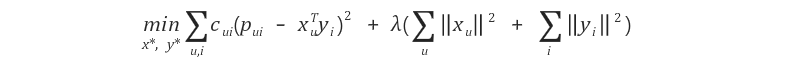


- C: confidence matrix
- P: binary rating matrix
- X: user latent matrix
- Y: item latent matrix
- r_lambda: regularization lambda
- xTy: predict matrix

- Total_loss = (confidence_level * predict loss) + regularization loss


        Loss Function 
           - predict error : (pui - xTyi)^2                  (0과 1로 나누어 선호 비선호를 예측한 결과의 에러)
           - confidence error: cui(pui - xTyi)^2             (confidence level을 적용한 predict error)
           - regularization: lambda(sumX +sumY)              (정규화를 위한 값)
           - total loss: confidence error + regularization   (최종 loss)

In [7]:
def loss_function(C, P, xTy, X, Y, r_lambda):
    predict_error = np.square(P - xTy)
    confidence_error = np.sum(C * predict_error)
    regularization = r_lambda * (np.sum(np.square(X)) + np.sum(np.square(Y)))
    total_loss = confidence_error + regularization
    return np.sum(predict_error), confidence_error, regularization, total_loss

#### Optimization Function for user and item ( Optimizer 설정)

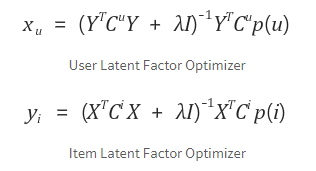

- X[u] = (yTCuy + lambda*I)^-1yTCuy
- Y[i] = (xTCix + lambda*I)^-1xTCix
- two formula is the same when it changes X to Y and u to i

In [8]:
def optimize_user(X, Y, C, P, nu, nf, r_lambda):
    yT = np.transpose(Y)
    for u in range(nu):
        Cu = np.diag(C[u])
        yT_Cu_y = np.matmul(np.matmul(yT, Cu), Y)
        lI = np.dot(r_lambda, np.identity(nf))
        yT_Cu_pu = np.matmul(np.matmul(yT, Cu), P[u])
        X[u] = np.linalg.solve(yT_Cu_y + lI, yT_Cu_pu)

def optimize_item(X, Y, C, P, ni, nf, r_lambda):
    xT = np.transpose(X)
    for i in range(ni):
        Ci = np.diag(C[:, i])
        xT_Ci_x = np.matmul(np.matmul(xT, Ci), X)
        lI = np.dot(r_lambda, np.identity(nf))
        xT_Ci_pi = np.matmul(np.matmul(xT, Ci), P[:, i])
        Y[i] = np.linalg.solve(xT_Ci_x + lI, xT_Ci_pi)

#### Train (학습)
- usually ALS algorithm repeat train steps for 10 ~ 15 times

In [9]:
predict_errors = []
confidence_errors = []
regularization_list = []
total_losses = []

for i in range(15):
    if i!=0:   
        optimize_user(X, Y, C, P, nu, nf, r_lambda)
        optimize_item(X, Y, C, P, ni, nf, r_lambda)
    predict = np.matmul(X, np.transpose(Y))
    predict_error, confidence_error, regularization, total_loss = loss_function(C, P, predict, X, Y, r_lambda)
    
    predict_errors.append(predict_error)
    confidence_errors.append(confidence_error)
    regularization_list.append(regularization)
    total_losses.append(total_loss)
    
    print('----------------step %d----------------' % i)
    print("predict error: %f" % predict_error)
    print("confidence error: %f" % confidence_error)
    print("regularization: %f" % regularization)
    print("total loss: %f" % total_loss)
    
predict = np.matmul(X, np.transpose(Y))
print('final predict')
print([predict])

----------------step 0----------------
predict error: 22.766663
confidence error: 3467.164410
regularization: 5.672927
total loss: 3472.837337
----------------step 1----------------
predict error: 31.829765
confidence error: 278.463685
regularization: 635.939519
total loss: 914.403204
----------------step 2----------------
predict error: 34.685893
confidence error: 136.378159
regularization: 649.684953
total loss: 786.063112
----------------step 3----------------
predict error: 32.726799
confidence error: 119.481076
regularization: 650.239030
total loss: 769.720106
----------------step 4----------------
predict error: 30.075861
confidence error: 109.380163
regularization: 653.119241
total loss: 762.499404
----------------step 5----------------
predict error: 27.497929
confidence error: 102.493188
regularization: 656.119545
total loss: 758.612733
----------------step 6----------------
predict error: 25.345757
confidence error: 97.721425
regularization: 658.587759
total loss: 756.309184


#### Train Analysist and Visualizaing (학습 결과 분석 및 시각화

<Figure size 432x288 with 0 Axes>

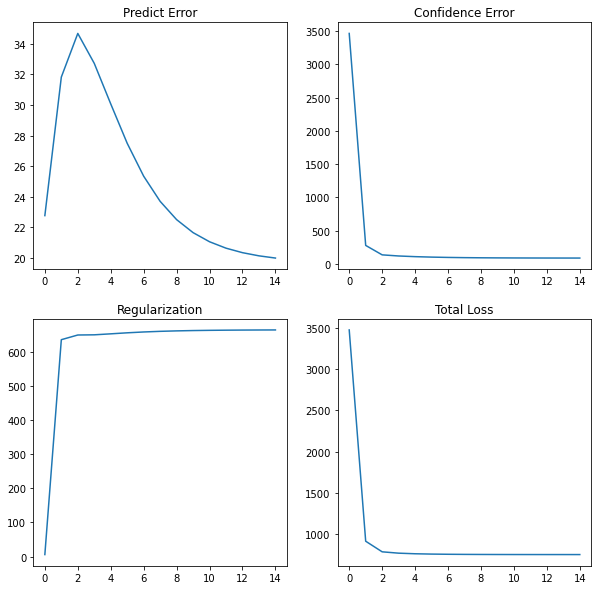

In [10]:
from matplotlib import pyplot as plt
%matplotlib inline

plt.subplots_adjust(wspace=100.0, hspace=20.0)
fig = plt.figure()
fig.set_figheight(10)
fig.set_figwidth(10)
predict_error_line = fig.add_subplot(2, 2, 1)
confidence_error_line = fig.add_subplot(2, 2, 2)
regularization_error_line = fig.add_subplot(2, 2, 3)
total_loss_line = fig.add_subplot(2, 2, 4)

predict_error_line.set_title("Predict Error") 
predict_error_line.plot(predict_errors)

confidence_error_line.set_title("Confidence Error")
confidence_error_line.plot(confidence_errors)

regularization_error_line.set_title("Regularization")
regularization_error_line.plot(regularization_list)

total_loss_line.set_title("Total Loss")
total_loss_line.plot(total_losses)
plt.show()

- predict Error의 경우 처음에 증가하지만 이내 감소하여 안정적으로 수렴함
- Confidence Error와 Total Loss는 안정적으로 감소함

- 최종 Loss가 일정 수준 이하로 떨어지지 않는 이유는, 평점 데이터에서 0으로 주어진 항목들에 대한 예측값을 반환하기 때문
- 이는 Loss function에서는 에러라고 간주하기 때문에 Total Loss가 일정 수준 이하로 떨어지지 않음

- Regularization의 경우 처음에는 작은 값이다가 급격하게 증가하여 일정하게 유지되는 것을 볼 수 있음

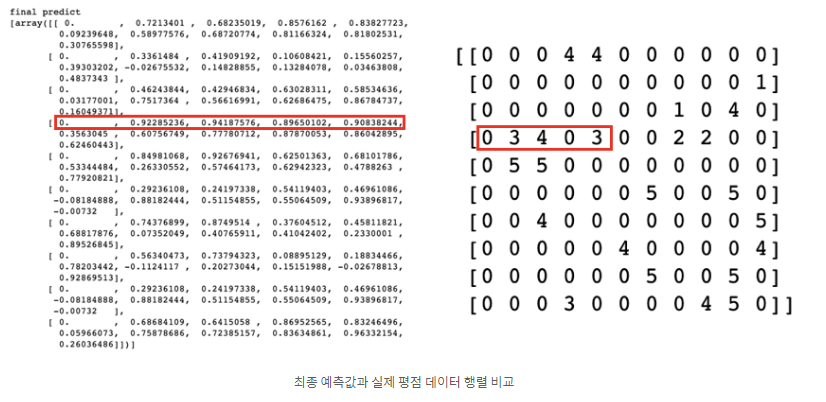

- 초반에 작은 값을 가지는 것은 사용자와 아이템의 Latent Matrix를 아주 작은 값들로 초기화 했기 때문
- 하지만 학습이 진행되면서 Latent Matrix가 어느 정도 값을 유지하게 되면, Regularization 의 크기가 커지면서 일정수준을 유지하게 됨
- 최종 예측 결과와 학습용 데이터를 비교했을 때, 최종 예측 결과를 분석해보면 원본 평점이 높을 수록 더 높은 값을 예측함
- 붉은 색 네모로 표시한 부분을 보면 원본 평점에서 3과 4를 기록한 항목에 대해서 각각 0.92, 0.94로 높은 선호도를 예측함
- 네 번째 행목의 경우 원본 평점 행렬에서는 0이었지만 높은 예측값을 가지는 것을 볼 수 있고 이러한 항목이 곧 추천 결과물로 제공됨

- 한 편 첫 번째 항목의 경우 여전히 예측값이 0으로 남아 있는데, 이는 원본 평점 행렬에서 첫 번째 해당하는 값들이 모두 0으로 남아 있기 때문이고, 아무도 평점을 내려주지 않은 아이템에 대해서는 선호도를 예측할 수 없는 cold start 문제를 의미함